file POST_IHC_PS23-21433_A1_PS23-21433_B1_PS23-22604_A1_cd_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-17071_A1_cd_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-22706_A1_PS23-22706_B1_PS23-24449_A1_cd_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-25749_A1_PS23-28165_A1_cd_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-15535_A1_non-spec_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-17345_A1_PS23-17706_A1_normal_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-18001_A1_normal_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-18316_A1_PS23-18379_A1_PS23-18656_A1_normal_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-18669_A1_normal_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-20420_A1_PS23-20442_A1_normal_HE-CD3.svs_aligned.ome.csv
file POST_IHC_PS23-25204_A1_PS23-17242_A1_normal_HE-CD3.svs_aligned.ome.csv


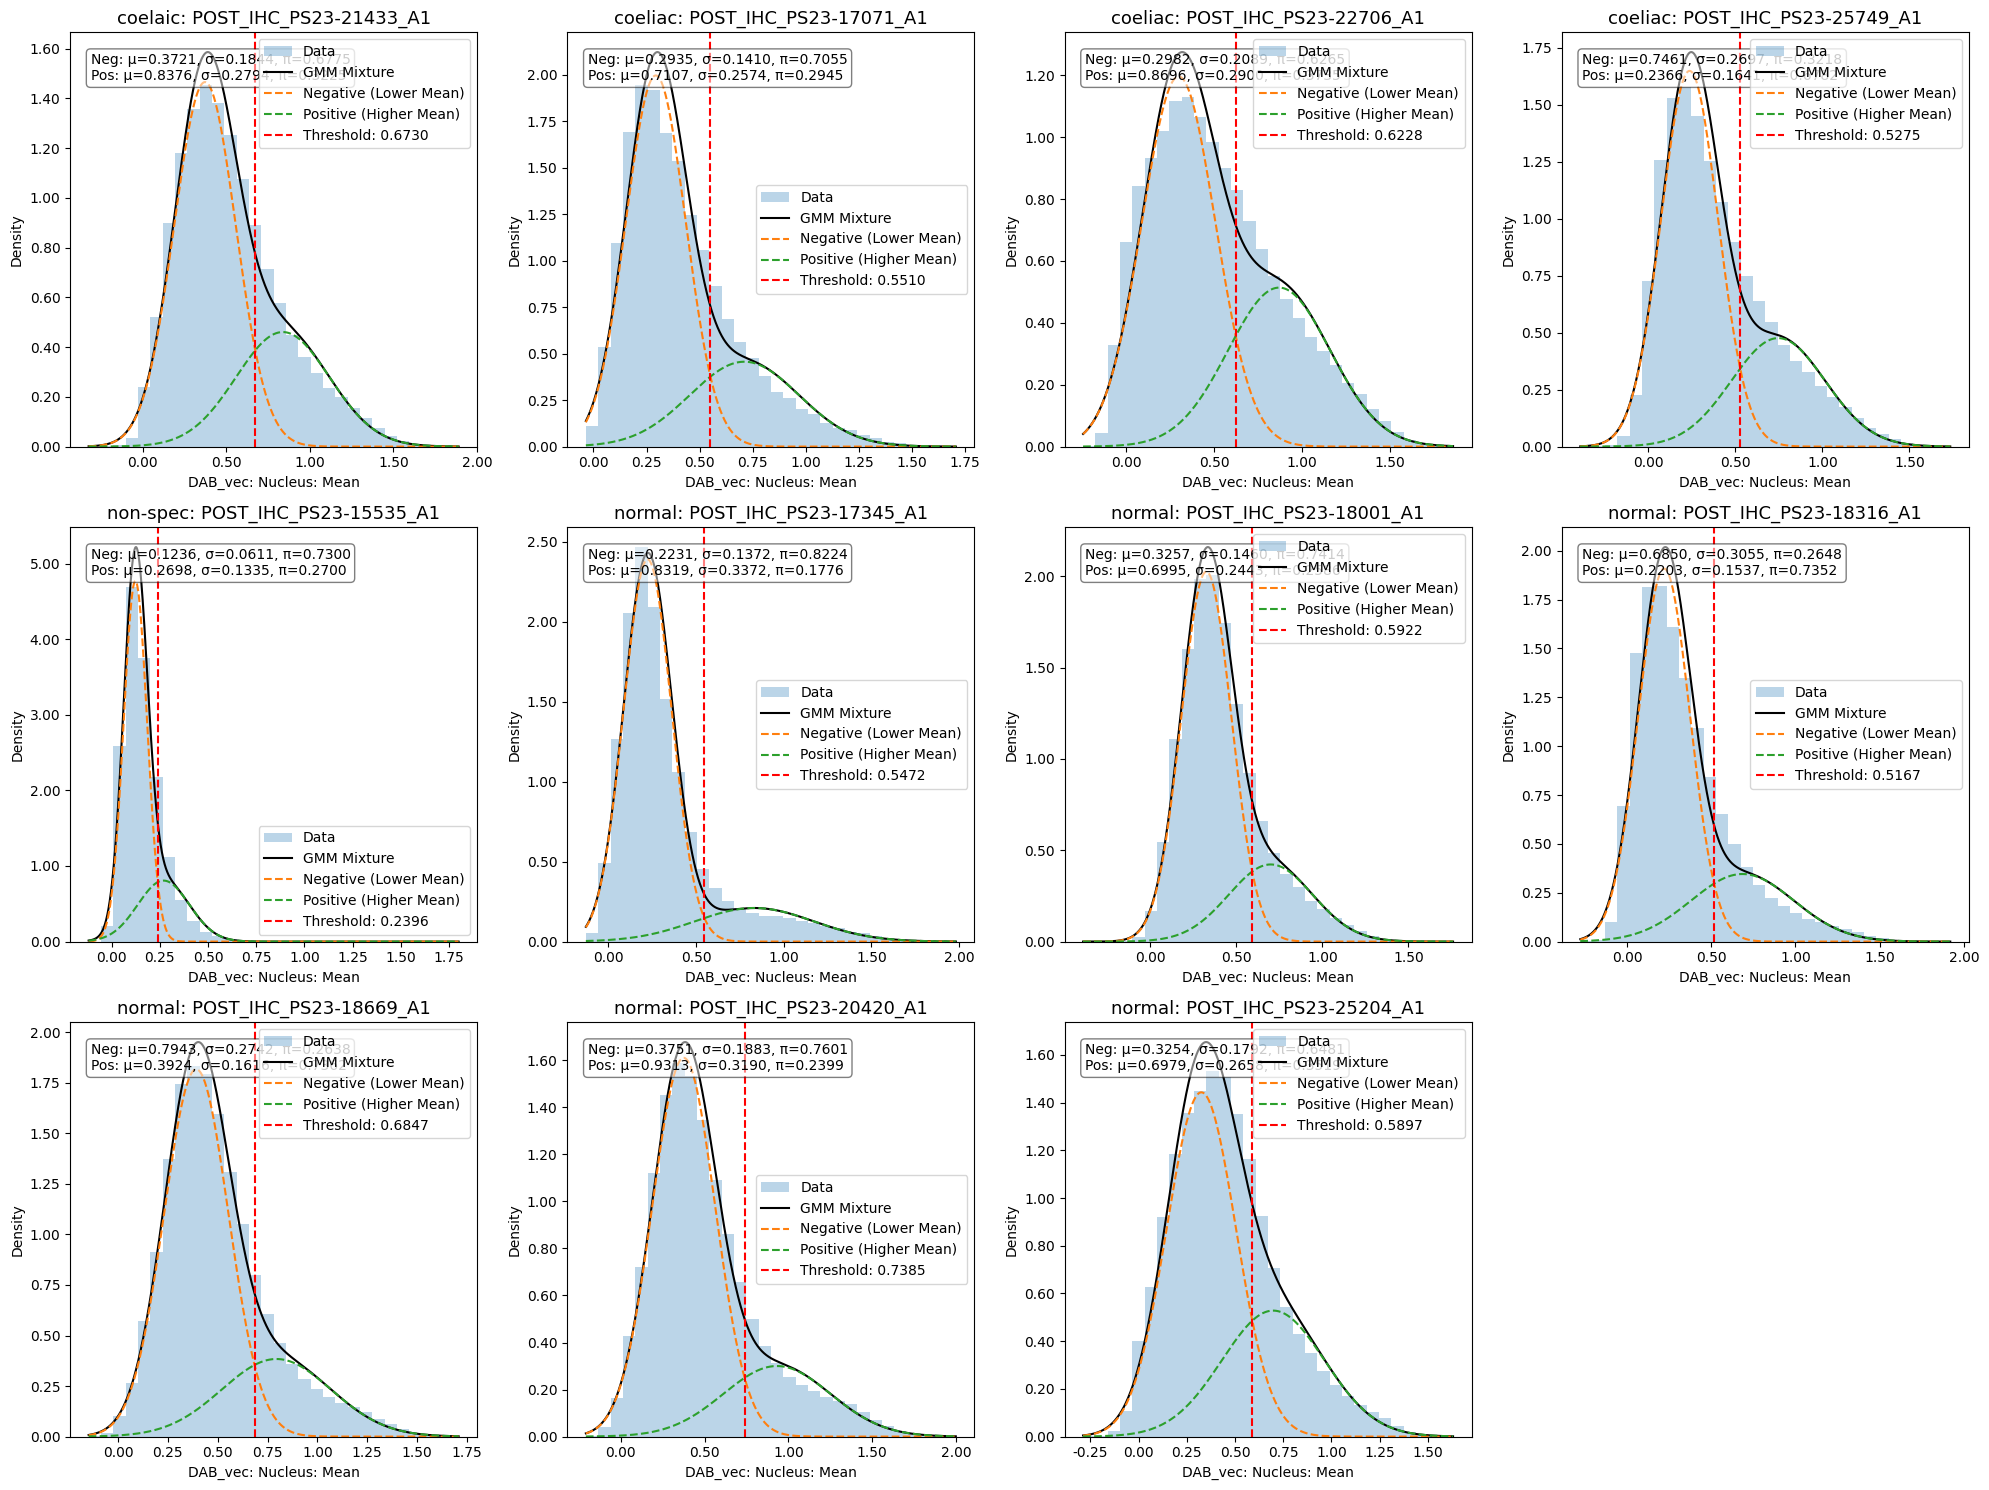

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
from scipy.stats import norm

CSV_DIRECTORY = "/rds/user/mf774/hpc-work/part_II_project/in-house/create-masks/segmentation-annotation-data/universal-stardist/universal-stardist-csvs/"
STAIN_TYPE = "CD3"

os.chdir(CSV_DIRECTORY)

if STAIN_TYPE == "CD3":
    column_name = "DAB_vec: Nucleus: Mean"
    file_names = {
    "POST_IHC_PS23-15535_A1_non-spec_HE-CD3.svs_aligned.ome.csv": "non-spec",
    "POST_IHC_PS23-17071_A1_cd_HE-CD3.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-17345_A1_PS23-17706_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18001_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18316_A1_PS23-18379_A1_PS23-18656_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18669_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-20420_A1_PS23-20442_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-21433_A1_PS23-21433_B1_PS23-22604_A1_cd_HE-CD3.svs_aligned.ome.csv": "coelaic",
    "POST_IHC_PS23-22706_A1_PS23-22706_B1_PS23-24449_A1_cd_HE-CD3.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-25204_A1_PS23-17242_A1_normal_HE-CD3.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-25749_A1_PS23-28165_A1_cd_HE-CD3.svs_aligned.ome.csv": "coeliac"
}
elif STAIN_TYPE == "CK":
    column_name = "DAB_vec: Cytoplasm: Mean"
    file_names = {
    "POST_IHC_PS23-14642_A1_ulcer_HE-CK.svs_aligned.ome.csv": "ulcer",
    "POST_IHC_PS23-15535_A1_non-spec_HE-CK.svs_aligned.ome.csv": "non-spec",
    "POST_IHC_PS23-15709_A1_PS23-20460_net_HE-CK.svs_aligned.ome.csv": "net",
    "POST_IHC_PS23-16539_A_PS23-16539_B1_PS23-10072_A1_eosc_HE-CK.svs_aligned.ome.csv": "eosc",
    "POST_IHC_PS23-17071_A1_cd_HE-CK.svs_aligned.ome.csv" : "coeliac",
    "POST_IHC_PS23-17771_A1_PS23-17948_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18001_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18316_A1_PS23-18379_A1_PS23-18656_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18359_A1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_B1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_D1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_D2_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18669_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-19820_A_PS23-20019_A1_PS23-20493_A1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-20420_A1_PS23-20442_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-21268_A1_PS23-21268_B1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-21433_A1_PS23-21433_B1_PS23-22604_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-22706_A1_PS23-22706_B1_PS23-24449_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-24970_A1_PS23-09489_A1_carcinoma_HE-CK.svs_aligned.ome.csv": "carcinoma",
    "POST_IHC_PS23-25204_A1_PS23-17242_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-25749_A1_PS23-28165_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-17345_A1_PS23-17706_A1_normal_HE-CK.svs_aligned.ome.csv": "normal"
    }
    print(len(file_names))    
elif STAIN_TYPE == "CD15":
     column_name = "DAB_vec: Cytoplasm: Mean"
else:
    print("Error: incompatible stain type")

def sort_dict_by_value(d):
    return dict(sorted(d.items(), key=lambda item: item[1]))

# function to extract DAB_stain value of interest from csv file
def get_DAB_stains(file_name):
    all_measurements = pd.read_csv(f'{file_name}')
    mean_DAB_stains = all_measurements[column_name]
    mean_DAB_stains = mean_DAB_stains.dropna()
    return np.sort(np.array(mean_DAB_stains).reshape(-1,1))

# aesthetic function
def format_axis(ax):
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))

def find_threshold(mean1, std1, mean2, std2, weight1, weight2):
    """Find the optimal DAB threshold where the two Gaussians have equal probability."""
    a = -1/std1**2 + 1/std2**2
    b = 2*(-mean2/std2**2 + mean1/std1**2)
    c = mean2**2/std2**2 - mean1**2/std1**2 + np.log((std2**2*weight1**2)/(std1**2*weight2**2))
    roots = np.roots([a,b,c])
    return max(roots)


# function which iterates over all files in file_names and datapoints with fitted GMMs
def plot_all_gmms(file_names):
    all_mean_DAB_stains = []
    all_labels =[]

    num_files = len(file_names)
    num_rows = int(np.ceil(num_files / 4))  # Adjust to fit 4 columns per row
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    sorted_file_names = sort_dict_by_value(file_names)
    # Open a CSV file to save thresholds
    with open(f"thresholds_{STAIN_TYPE}.csv", mode="w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["File Name", "Threshold"])  # Header row

        for i, file in enumerate(sorted_file_names):
            print("file", file)

            mean_DAB_stains = get_DAB_stains(file)
            gmm = GMM(n_components = 2, max_iter=1000, random_state=10, covariance_type = 'full')
            labels = gmm.fit_predict(mean_DAB_stains)
            means = gmm.means_
            covs  = gmm.covariances_
            weights = gmm.weights_

            x_axis = np.linspace(min(mean_DAB_stains), max(mean_DAB_stains), num=len(mean_DAB_stains)).reshape(-1, 1)

            if means[0][0] > means [1][0]:
                positive_gaussian = norm.pdf(x_axis, float(means[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0]
                negative_gaussian = norm.pdf(x_axis, float(means[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1]
            else:
                negative_gaussian = norm.pdf(x_axis, float(means[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0]
                positive_gaussian = norm.pdf(x_axis, float(means[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1]
        
            ax = axes[i]
            ax.hist(mean_DAB_stains, bins=30, density=True, alpha=0.3, label='Data')
            ax.plot(x_axis, negative_gaussian+positive_gaussian, label="GMM Mixture", color='black')
            ax.plot(x_axis, negative_gaussian, linestyle='dashed', label='Negative (Lower Mean)')
            ax.plot(x_axis, positive_gaussian, linestyle='dashed', label='Positive (Higher Mean)')
            
            std_devs = np.sqrt(gmm.covariances_.flatten())
            means = means.flatten()
            ax.text(0.05, 0.95, f"Neg: μ={means[0]:.4f}, σ={std_devs[0]:.4f}, π={gmm.weights_[0]:.4f}\nPos: μ={means[1]:.4f}, σ={std_devs[1]:.4f}, π={gmm.weights_[1]:.4f}",
                    transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

            threshold = find_threshold(means[0], std_devs[0], means[1], std_devs[1], gmm.weights_[0], gmm.weights_[1])
            csv_writer.writerow([os.path.basename(file), threshold])  # Save to CSV
            try:
                ax.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
            except:
                print("error occurred")
                
            # labels = gmm.predict(mean_DAB_stains)
            all_labels.append(labels)
            all_mean_DAB_stains.append(mean_DAB_stains)

            short_name = os.path.basename(file)[:22]
            category = file_names[os.path.basename(file)]
            ax.set_title(f"{category}: {short_name}", fontsize=13)
            ax.set_xlabel(column_name)
            ax.set_ylabel('Density')
            ax.legend()
            format_axis(ax)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig(f"/rds/user/mf774/hpc-work/part_II_project/in-house/create-masks/analysis/gaussian_mixtures_{STAIN_TYPE}.png")
    plt.show()
    return all_mean_DAB_stains, all_labels

if __name__ == "__main__":
    mean_DAB_stains, labels = plot_all_gmms(file_names)

1420267
1420267
612221
Estimated Cutoff: 1.35945


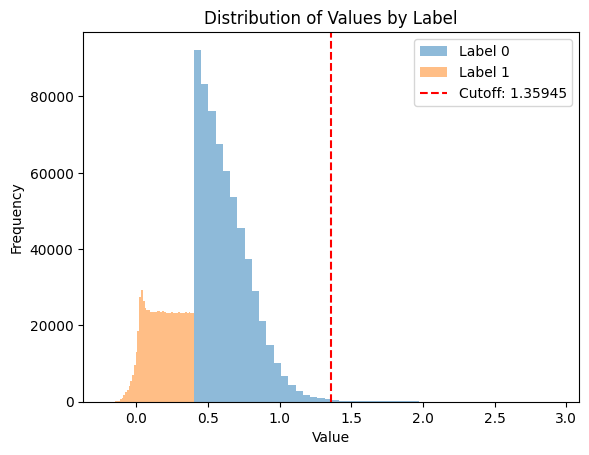

In [3]:
#print(labels)
print(len(mean_DAB_stains[0]))
print(len(labels[0]))
print(sum(labels[0]))


# Flatten values and labels
values_flat = mean_DAB_stains[0].flatten()
labels_flat = labels[0].flatten()

# Separate values based on labels
values_1 = values_flat[labels_flat == 0]
values_0 = values_flat[labels_flat == 1]

# Estimate cutoff
max_0 = np.max(values_0)  # Largest value labeled as 0
min_1 = np.min(values_1)  # Smallest value labeled as 1
cutoff_estimate = (max_0 + min_1) / 2

print(f"Estimated Cutoff: {cutoff_estimate:.5f}")

# Plot distributions
plt.hist(values_0, bins=50, alpha=0.5, label="Label 0")
plt.hist(values_1, bins=50, alpha=0.5, label="Label 1")
plt.axvline(cutoff_estimate, color='red', linestyle='dashed', label=f"Cutoff: {cutoff_estimate:.5f}")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Values by Label")
plt.show()

16960


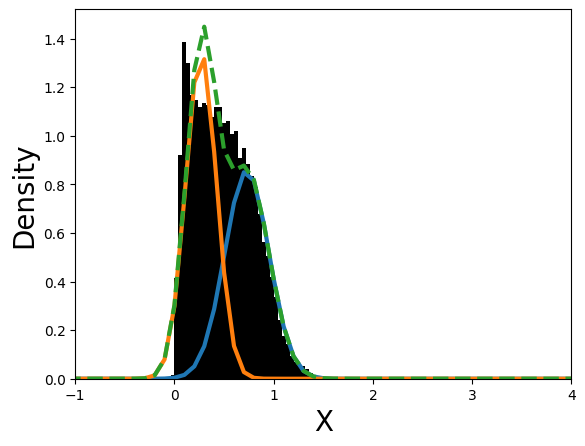

In [10]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
from scipy.stats import norm

os.chdir('/rds/user/mf774/hpc-work/part_II_project/in-house/immunostaining/CK-distributions/')

file_names = {
    "POST_IHC_PS23-14642_A1_ulcer_HE-CK_aligned.ome.csv": "ulcer",
    "POST_IHC_PS23-15535_A1_non-spec_HE-CK.svs_aligned.ome.csv": "non-spec",
    "POST_IHC_PS23-15709_A1_PS23-20460_net_HE-CK.svs_aligned.ome.csv": "net",
    "POST_IHC_PS23-16539_A_PS23-16539_B1_PS23-10072_A1_eosc_HE-CK.svs_aligned.ome.csv": "eosc",
    "POST_IHC_PS23-17071_A1_cd_HE-CK.svs_aligned.ome.csv" : "coeliac",
    "POST_IHC_PS23-17771_A1_PS23-17948_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18001_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18316_A1_PS23-18379_A1_PS23-18656_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-18359_A1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_B1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_D1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18359_D2_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-18669_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-19820_A_PS23-20019_A1_PS23-20493_A1_adenoma_HE-CK.svs_aligned.ome.csv": "adenoma",
    "POST_IHC_PS23-20420_A1_PS23-20442_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-21268_A1_PS23-21268_B1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-21433_A1_PS23-21433_B1_PS23-22604_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-22706_A1_PS23-22706_B1_PS23-24449_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac",
    "POST_IHC_PS23-24970_A1_PS23-09489_A1_carcinoma_HE-CK.svs_aligned.ome.csv": "carcinoma",
    "POST_IHC_PS23-25204_A1_PS23-17242_A1_normal_HE-CK.svs_aligned.ome.csv": "normal",
    "POST_IHC_PS23-25749_A1_PS23-28165_A1_cd_HE-CK.svs_aligned.ome.csv": "coeliac"
}

def get_mean_DAB_stains(file_name):
    all_measurements = pd.read_csv(file_name)
    # print(all_measurements.head())
    mean_DAB_stains = all_measurements["Cytoplasm: DAB_vec OD mean"]
    return np.array(mean_DAB_stains).reshape(-1,1)

mean_DAB_stains = get_mean_DAB_stains('CK_distributions/POST_IHC_PS23-15535_A1_non-spec_HE-CK.svs_aligned.ome.csv')

# create GMM model object
gmm = GMM(n_components = 2, max_iter=1000, random_state=10, covariance_type = 'full')
# find useful parameters
mean = gmm.fit(mean_DAB_stains).means_
covs  = gmm.fit(mean_DAB_stains).covariances_
weights = gmm.fit(mean_DAB_stains).weights_


# create necessary things to plot
x_axis = np.arange(-20, 30, 0.1)
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

labels = gmm.fit_predict(mean_DAB_stains)
print(sum(labels))


# ax = fig.add_subplot(1,2,2)
# Plot 2
plt.hist(mean_DAB_stains, density=True, color='black', bins=np.arange(-1, 4, 0.04))
plt.plot(x_axis, y_axis0, lw=3, c='C0')
plt.plot(x_axis, y_axis1, lw=3, c='C1')
plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
plt.xlim(-1, 4)
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

[[ 9.71812284]
 [-2.446734  ]
 [ 9.92421323]
 ...
 [10.87869171]
 [10.48062896]
 [10.24960442]]


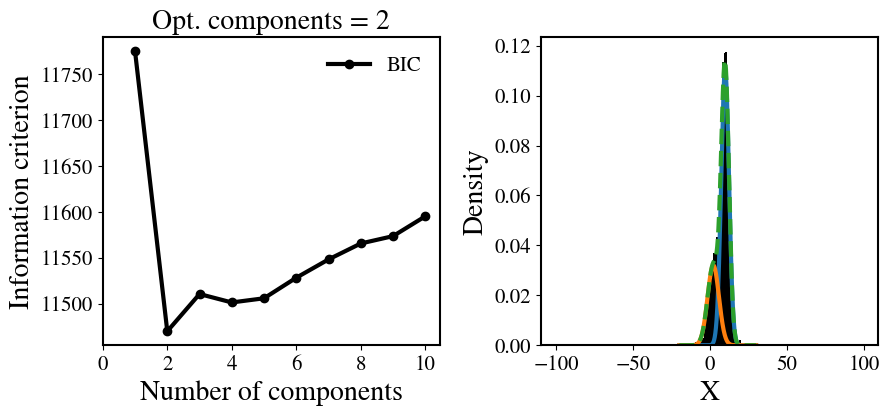

In [60]:
# import libraries (some are for cosmetics)
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
# import astropy
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


# create the data as in @Meng's answer
x = np.concatenate((np.random.normal(5, 5, 1000), np.random.normal(10, 2, 1000)))
x = x.reshape(-1, 1)
print(x)

# first of all, let's confirm the optimal number of components
bics = []
min_bic = 0
counter=1
for i in range (10): # test the AIC/BIC metric between 1 and 10 components
  gmm = GMM(n_components = counter, max_iter=1000, random_state=0, covariance_type = 'full')
  labels = gmm.fit(x).predict(x)
  bic = gmm.bic(x)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = counter
  counter = counter + 1


# plot the evolution of BIC/AIC with the number of components
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot 1
plt.plot(np.arange(1,11), bics, 'o-', lw=3, c='black', label='BIC')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Information criterion', fontsize=20)
plt.xticks(np.arange(0,11, 2))
plt.title('Opt. components = '+str(opt_bic), fontsize=20)


# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = opt_bic

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x).means_  
covs  = gmm.fit(x).covariances_
weights = gmm.fit(x).weights_

# create necessary things to plot
x_axis = np.arange(-20, 30, 0.1)
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

ax = fig.add_subplot(1,2,2)
# Plot 2
plt.hist(x, density=True, color='black', bins=np.arange(-100, 100, 1.00))
plt.plot(x_axis, y_axis0, lw=3, c='C0')
plt.plot(x_axis, y_axis1, lw=3, c='C1')
plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
# plt.xlim(-3, 4)
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')